Test persoon: 621e346f67b776a24081744f

In [59]:
from pymongo import MongoClient
from bson import ObjectId
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
client = MongoClient("mongodb://localhost:27017/")
	
db = client["lifesnaps"]
collection = db["fitbit"]

person = "621e2f9167b776a240011ccb"

query = {
    "id": ObjectId(person),
    "type": "sleep"
}

doc = collection.find(query)

In [104]:
records = []

for doc in collection.find(query):
    try:
        # Totaal aantal slaap in 1 nacht:
        total_sleep = doc["data"]["minutesAsleep"]/60
        # Deep, light en rem slaap in 1 naacht: 
        deep = doc["data"]["levels"]["summary"]["deep"]["minutes"] / 60
        light = doc["data"]["levels"]["summary"]["light"]["minutes"] / 60
        rem = doc["data"]["levels"]["summary"]["rem"]["minutes"] / 60
        
        date = pd.to_datetime(doc["data"]["dateOfSleep"])
        records.append({"date": date, "total_sleep": total_sleep, "light": light, "deep": deep,"rem": rem})
    except:
        print("foutje")
    
df = pd.DataFrame(records)
df.set_index('date', inplace=True)
df = df.sort_index()


foutje
foutje
foutje
foutje
foutje
foutje
foutje


In [105]:
df

,total_sleep,light,deep,rem
date,,,,
2021-10-24,8.750000,5.666667,1.066667,2.016667
2021-10-25,5.683333,3.600000,0.650000,1.433333
2021-10-26,6.933333,3.700000,1.016667,2.216667
2021-10-27,5.033333,2.783333,0.833333,1.416667
2021-10-28,8.416667,4.933333,1.333333,2.150000
...,...,...,...,...
2022-01-14,6.666667,4.016667,0.966667,1.683333
2022-01-15,8.383333,4.366667,1.300000,2.716667
2022-01-16,6.016667,4.100000,0.616667,1.300000


In [ ]:
# Berekent het gemiddelde aantal uren slaap van de afgelopen 7 dagen
# Start wel pas vanaf dag 8
weekly_avg = df['total_sleep'].rolling(window=7).mean()
df['weekly_avg'] = weekly_avg.shift(1)
print(df[['total_sleep','weekly_avg']])

            total_sleep  weekly_avg
date                               
2021-10-24     8.750000         NaN
2021-10-25     5.683333         NaN
2021-10-26     6.933333         NaN
2021-10-27     5.033333         NaN
2021-10-28     8.416667         NaN
...                 ...         ...
2022-01-14     6.666667    5.719048
2022-01-15     8.383333    5.750000
2022-01-16     6.016667    5.914286
2022-01-17     5.116667    5.759524
2022-01-18     6.116667    5.730952

[89 rows x 2 columns]


In [108]:
# Voorbeeld van hoe je een specifieke maand kan selecteren:
df_test = df.loc['2021-11']
print(df_test)

            total_sleep     light      deep       rem  weekly_avg
date                                                             
2021-11-01     7.716667  3.733333  2.066667  1.916667    6.557143
2021-11-02     5.916667  2.766667  1.583333  1.566667    6.847619
2021-11-03     6.083333  3.650000  0.583333  1.850000    6.702381
2021-11-04     4.650000  2.766667  0.683333  1.200000    6.852381
2021-11-05     5.733333  3.033333  1.216667  1.483333    6.314286
2021-11-06     9.933333  5.383333  1.733333  2.816667    6.809524
2021-11-07     5.633333  3.833333  0.666667  1.133333    6.811905
2021-11-08     5.816667  3.300000  0.700000  1.816667    6.523810
2021-11-09     7.600000  4.766667  0.866667  1.966667    6.252381
2021-11-10     5.466667  3.050000  1.100000  1.316667    6.492857
2021-11-11     4.950000  2.816667  0.916667  1.216667    6.404762
2021-11-12     5.966667  3.500000  0.866667  1.600000    6.447619
2021-11-13     9.216667  5.116667  0.983333  3.116667    6.480952
2021-11-14

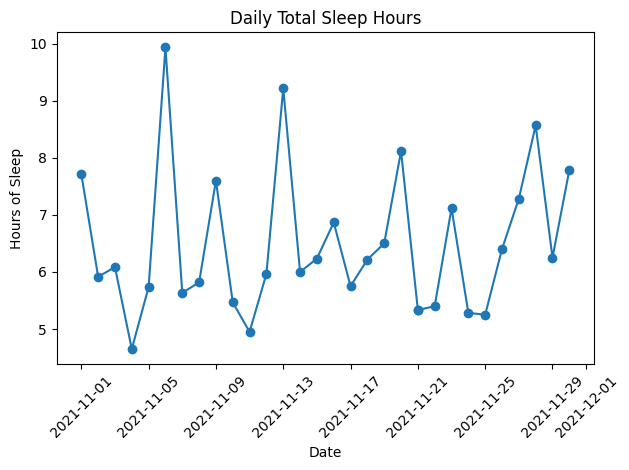

In [109]:
# Grafiek van aantal uren slaap van 1 maand
plt.figure()
plt.plot(df_test.index, df_test['total_sleep'], marker='o', linestyle='-')
plt.title("Daily Total Sleep Hours")
plt.xlabel("Date")
plt.ylabel("Hours of Sleep")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()